<a href="https://colab.research.google.com/github/Yunhua468/Stochastic-Opetimization/blob/franz/ex_7_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import math
import random
import scipy as sp
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)
np.random.seed(42)

In [27]:
def X(theta):
  lambd = 1.0 / (50*theta)
  return random.expovariate(lambd)

(array([2.499e+03, 1.886e+03, 1.393e+03, 1.093e+03, 8.270e+02, 5.970e+02,
        4.500e+02, 2.960e+02, 2.270e+02, 1.630e+02, 1.380e+02, 1.120e+02,
        8.700e+01, 5.700e+01, 3.600e+01, 4.100e+01, 2.100e+01, 2.000e+01,
        1.800e+01, 1.200e+01, 7.000e+00, 4.000e+00, 5.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([1.78562053e-01, 1.45202606e+03, 2.90387355e+03, 4.35572105e+03,
        5.80756855e+03, 7.25941604e+03, 8.71126354e+03, 1.01631110e+04,
        1.16149585e+04, 1.30668060e+04, 1.45186535e+04, 1.59705010e+04,
        1.74223485e+04, 1.88741960e+04, 2.03260435e+04, 2.17778910e+04,
        2.32297385e+04, 2.46815860e+04, 2.61334335e+04, 2.75852810e+04,
        2.90371285e+04, 3.04889760e+04, 3.19408235e+04, 3.33926710e+04,
        3.48445185e+04, 3.62963660e+04, 3.77482135e+04, 3.92000609e+04,
        4.06519084e+04, 4.21037559e+04, 4.35556034e+04, 4.50074509e+04,
        4.64592984e+04

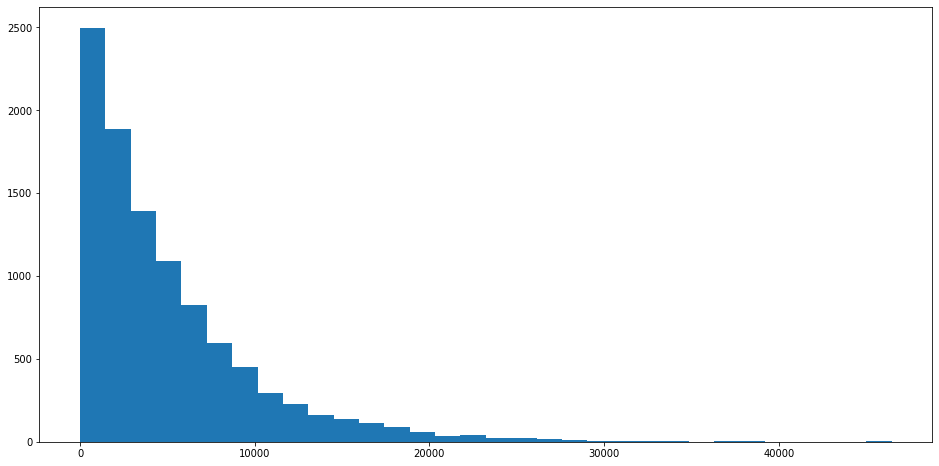

In [28]:
plt.figure(figsize=(16, 8))
plt.hist([X(100) for i in range(10000)], bins=32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


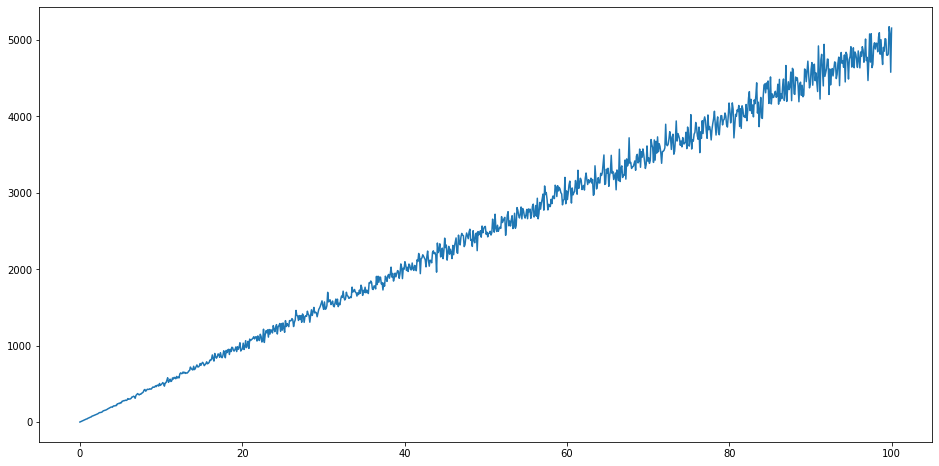

In [29]:
thetas = np.linspace(0, 100, 1000)
Xs = np.zeros_like(thetas)
for i in range(1000):
  Xs += np.array([X(theta) for theta in thetas])
Xs /= 1000
plt.figure(figsize=(16, 8))
plt.plot(thetas, Xs)

# Derivative estimation

In [30]:
def G_IPA(theta):
  X_ = X(theta) # sample value from the distribution
  grad = (X_ / theta) * (1/math.sqrt(1+X_) - X_/(2*((1+X_)**(3/2)))) - 1
  return grad

In [31]:
def G_SF(theta):
  X_ = X(theta)
  grad = (1/theta)*(X_/math.sqrt(X_ + 1))*(X_/(50*theta) - 1)
  return grad

In [34]:
def G_MVD(theta):
  X_ = X(theta)
  X__ = X(theta)
  grad = (50/theta)*((X_+X__)/math.sqrt(X_ + X__ + 1) - X_/math.sqrt(X_ + 1))
  return grad

# Confidence intervals

In [ ]:
plt.figure()

# Run simulations

In [53]:
epsilon = 0.0001
theta_ipa = 3.1
theta_sf = 3.1
theta_mvd = 3.1

iterations = []
thetas_ipa = []
thetas_sf = []
thetas_mvd = []
for i in range(10000):
  theta_ipa -= epsilon*G_IPA(theta_ipa)
  theta_sf -= epsilon*G_SF(theta_sf)
  theta_mvd -= epsilon*G_MVD(theta_mvd)

  if theta_ipa < 0.1:
    theta_ipa = 0.1
  if theta_sf < 0.1:
    theta_sf = 0.1
  if theta_mvd < 0.1:
    theta_mvd = 0.1

  iterations.append(i)
  thetas_ipa.append(theta_ipa)
  thetas_sf.append(theta_sf)
  thetas_mvd.append(theta_mvd)

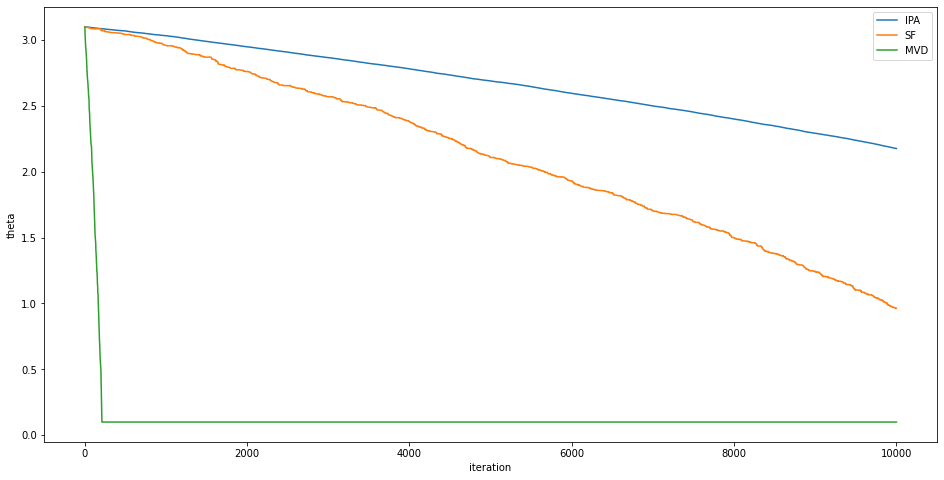

In [54]:
plt.figure(figsize=(16, 8))
plt.plot(iterations, thetas_ipa, iterations, thetas_sf, iterations, thetas_mvd)
plt.xlabel('iteration')
plt.ylabel('theta')
plt.legend(['IPA', 'SF', 'MVD'])
plt.show()